In [ ]:
# Date    :   2024-12-01
# Author  :   Dongwoo Yoon
# Contact :   dbsehddn0901@gmail.com


# EDA (Exploratory Data Analysis)

##1 . Load Dataset
- Soruce
  - https://www.kaggle.com/datasets/jangedoo/utkface-new
  - https://susanqq.github.io/UTKFace/
- Method (Kaggle API)
  1.  Login Kaggle
  2.  Click Settings
  3.  Create New Token -> Download kaggle.json



In [ ]:
!pip install kaggle

In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
# download kaggle datasets
!kaggle datasets download -d jangedoo/utkface-new

In [ ]:
!unzip utkface-new.zip

## 2 . Parse Dataset

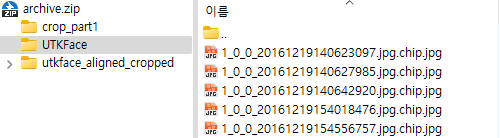

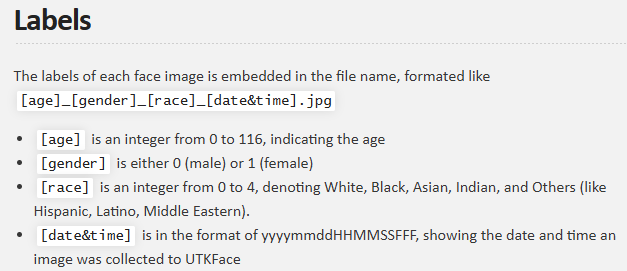
- Number of files: 23708
- Number of incorrectly labeled files : <font color="red">3</font>
  - UTKFace/61_1_20170109142408075.jpg.chip.jpg
    - 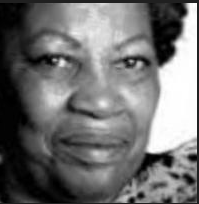

  - UTKFace/39_1_20170116174525125.jpg.chip.jpg
    - 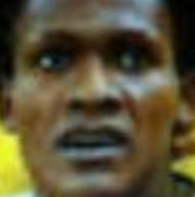

  - UTKFace/61_1_20170109150557335.jpg.chip.jpg
    - 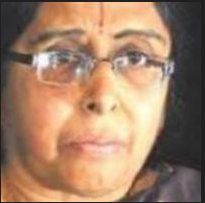

In [6]:
import pandas as pd
import os
from glob import glob

dataset_dict = {
    'race_id': {
        0: 'white',
        1: 'black',
        2: 'asian',
        3: 'indian',
        4: 'others'
    },
    'gender_id': {
        0: 'male',
        1: 'female'
    }
}

folder_name = 'UTKFace'

file_mapping = {
    "UTKFace/61_1_20170109142408075.jpg.chip.jpg": "UTKFace/61_1_1_20170109142408075.jpg.chip.jpg",
    "UTKFace/39_1_20170116174525125.jpg.chip.jpg": "UTKFace/39_0_1_20170116174525125.jpg.chip.jpg",
    "UTKFace/61_1_20170109150557335.jpg.chip.jpg": "UTKFace/61_1_3_20170109150557335.jpg.chip.jpg"
}

def parse_dataset(dataset_path, ext='jpg'):
    def parse_info_from_file(path):
        try:
            filename = os.path.split(path)[1]
            filename = os.path.splitext(filename)[0]
            age, gender, race, _ = filename.split('_')

            return int(age), dataset_dict['gender_id'][int(gender)], dataset_dict['race_id'][int(race)]
        except Exception as ex:
            return None, None, None

    files = glob(os.path.join(dataset_path, "*.%s" % ext))
    # print(len(files))

    records = []
    for file in files:

        if file in file_mapping:
            file = file_mapping[file]

        info = parse_info_from_file(file)
        if info[0] is not None:
            records.append(info)
        else:
          print(file)

    df = pd.DataFrame(records)
    # print(len(records))

    df['file'] = files[:len(records)]
    df.columns = ['age', 'gender', 'race', 'file']
    df = df.dropna()

    return df

df = parse_dataset(folder_name)

print(df.head())

   age  gender    race                                           file
0   31    male  others  UTKFace/31_0_4_20170120133240958.jpg.chip.jpg
1   58    male  indian  UTKFace/58_0_3_20170119211657945.jpg.chip.jpg
2   26  female  others  UTKFace/26_1_4_20170117201620471.jpg.chip.jpg
3   20  female  indian  UTKFace/20_1_3_20170104222019511.jpg.chip.jpg
4   26  female   white  UTKFace/26_1_0_20170117173257366.jpg.chip.jpg


## 3 . Random Image

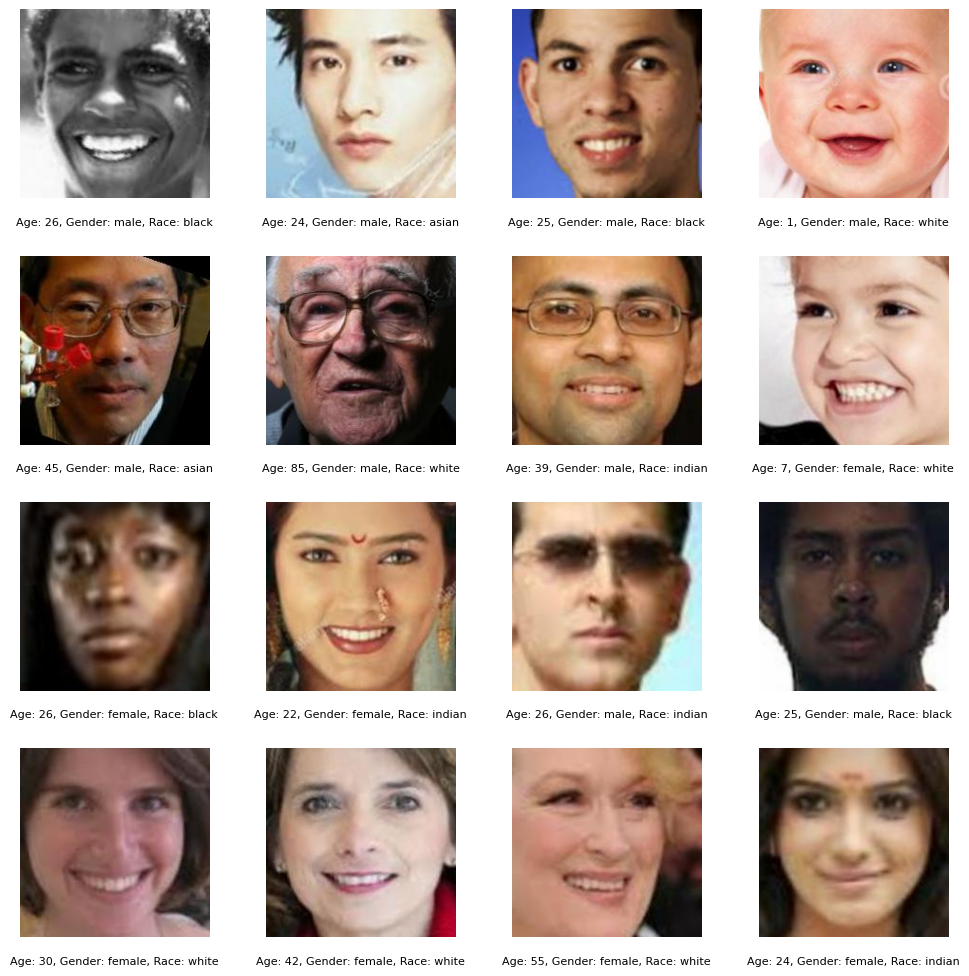

In [7]:
import matplotlib.pyplot as plt

sample_df = df.sample(n=16, random_state=42)

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten()

for ax, (_, row) in zip(axes, sample_df.iterrows()):
    img = plt.imread(row['file'])
    ax.imshow(img)
    ax.axis('off')

    info_text = f"Age: {row['age']}, Gender: {row['gender']}, Race: {row['race']}"
    ax.text(0.5, -0.1, info_text, ha='center', va='top', fontsize=8, transform=ax.transAxes)

plt.tight_layout()
plt.show()

## 4 . Gender Ratio

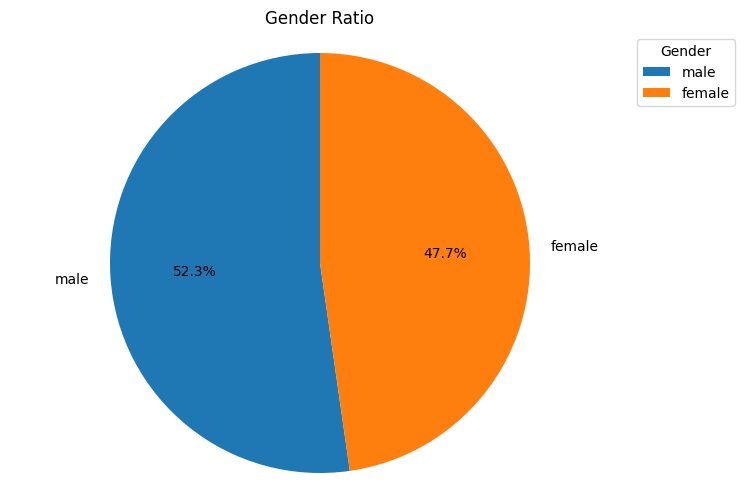

In [26]:
# Calculate the gender ratio
gender_counts = df['gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

# Add a legend
plt.legend(gender_counts.index, title="Gender", loc="upper left", bbox_to_anchor=(1, 1))

plt.title('Gender Ratio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## 5 . Race Distribution

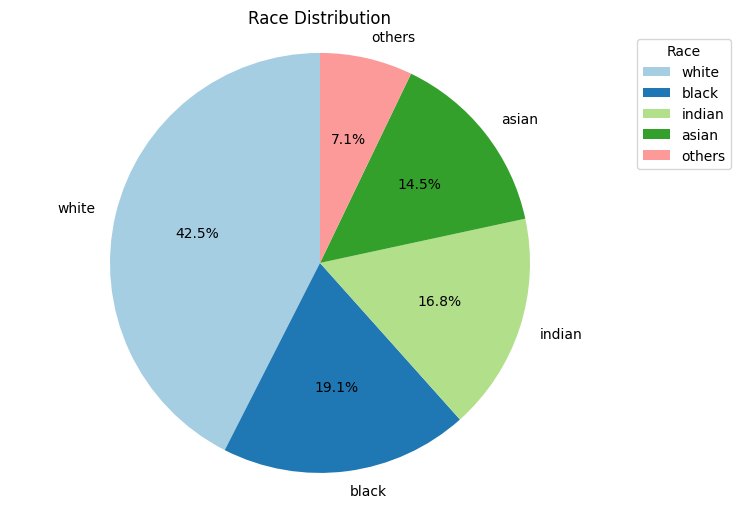

In [29]:
# Calculate the race distribution in the dataframe
race_counts = df['race'].value_counts()

# Visualize the race distribution as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    race_counts,
    labels=race_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors[:len(race_counts)]
)

# Add a legend outside the chart
plt.legend(race_counts.index, title="Race", loc="upper left", bbox_to_anchor=(1, 1))

plt.title('Race Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


## 6 . Age and Gender

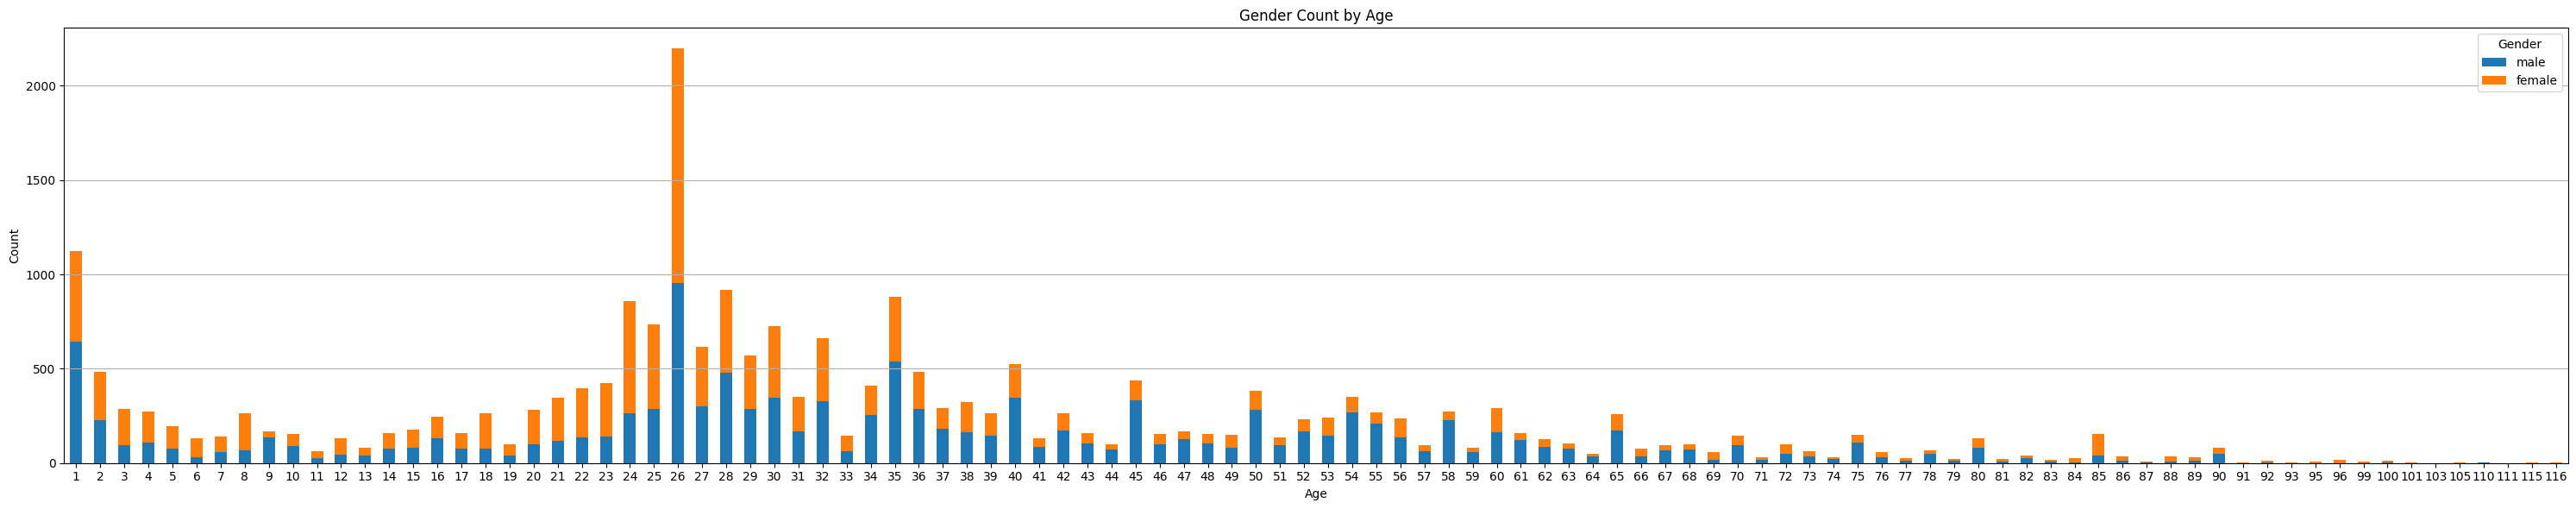

In [32]:
# Count the number of males and females by age
age_gender_counts = df.groupby(['age', 'gender']).size().unstack(fill_value=0)
age_gender_counts = age_gender_counts[['male', 'female']]

# Plot the graph
age_gender_counts.plot(kind='bar', stacked=True, figsize=(30, 6))

# Set the title and labels
plt.title('Gender Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.grid(axis='y')  # Add grid lines for better visualization

# Show the graph
plt.tight_layout()
plt.show()

In [38]:
# Generate all ages
full_age_range = range(df['age'].min(), df['age'].max() + 1)

# Unique age values sorted
unique_age_list = sorted(df['age'].unique())
print("Unique age values:", unique_age_list)

# Calculate missing ages
missing_ages = [age for age in full_age_range if age not in unique_age_list]
print("Missing ages:", missing_ages)

Unique age values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 99, 100, 101, 103, 105, 110, 111, 115, 116]
Missing ages: [94, 97, 98, 102, 104, 106, 107, 108, 109, 112, 113, 114]


In [34]:
# Filter ages where either male or female count under 10
under_10_counts = age_gender_counts[(age_gender_counts['male'] < 10) | (age_gender_counts['female'] < 10)]
print(under_10_counts)

gender  male  female
age                 
81         7      15
83         8      10
84         2      22
87         4       6
91         1       1
92         3      10
93         0       5
95         0       9
96         0      17
99         1       8
100        2       9
101        1       1
103        1       0
105        1       4
110        2       3
111        0       1
115        0       3
116        0       4


## 7 . Work Direction
-  Exclusion of Race as a Factor
  - Due to the uneven distribution of racial data, race will not be considered in the analysis or modeling process.
- Age and Gender Prediction
  - Following the original plan, age will not be grouped, and predictions will include both age and gender together.
- Grouping Exceptions for Older Age Brackets
  - As data for individuals in their 80s and over 90 is limited, these age groups will be categorized as "<mark style="background-color: orange; color: black;">80s</mark>" and "<mark style="background-color: orange; color: black;">90+</mark>" respectively.

## 8 . Image Size

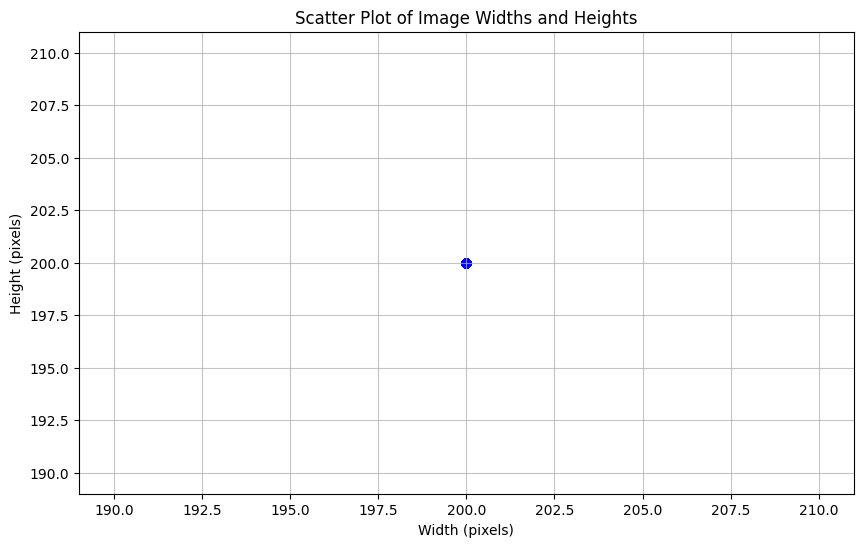

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Assuming df is your DataFrame and 'file' column contains the image paths
paths = df['file']

# List to store the dimensions of the images
dimensions = []

# Loop through each path to open the image and get its dimensions
for path in paths:
    try:
        with Image.open(path) as img:
            dimensions.append((img.width, img.height))  # Append the width and height as a tuple
    except Exception as e:
        print(f"Error opening image {path}: {e}")  # Handle any errors

# Convert the list of dimensions to a DataFrame for easier handling
dimensions_df = pd.DataFrame(dimensions, columns=['Width', 'Height'])

# Visualize the distribution of image widths and heights
plt.figure(figsize=(10, 6))
plt.scatter(dimensions_df['Width'], dimensions_df['Height'], alpha=0.7, color='blue')  # Create a scatter plot
plt.title('Scatter Plot of Image Widths and Heights')  # Title of the plot
plt.xlabel('Width (pixels)')  # X-axis label
plt.ylabel('Height (pixels)')  # Y-axis label
plt.grid(alpha=0.75)  # Add grid for better readability
plt.show()  # Display the plot